In [1]:
import numpy as np
from skimage.util import img_as_float, img_as_ubyte
from skimage.color import rgb2hsv, rgb2yiq, hsv2rgb, yiq2rgb
from skimage.io import imread, imshow
from skimage.filters import threshold_yen
from skimage.exposure import equalize_hist
from scipy.ndimage import uniform_filter 
from matplotlib import pyplot as plt
from skimage.morphology import label

In [2]:
def rgb2hsi(rgb_img):
    
    hsi_img = np.zeros(rgb_img.shape)
    rgb_img = img_as_float(rgb_img)
    epsilon = 1e-9
    
    for i in range(rgb_img.shape[0]):
        for j in range(rgb_img.shape[1]):

            R = rgb_img[i,j,0]+epsilon
            G = rgb_img[i,j,1]+epsilon
            B = rgb_img[i,j,2]+epsilon
            
            theta = np.arccos(0.5*((R-G)+(R-B))/(((R-G)**2+(R-B)*(G-B))**0.5+epsilon))
            if B<=G:
                H = theta
            else:
                H = 2*np.pi-theta
    
            S = 1-(3/(R+G+B))*min(R,G,B)
            I = (1/3)*(R+G+B)
            
            hsi_img[i,j,0] = H/(2*np.pi)
            hsi_img[i,j,1] = S           
            hsi_img[i,j,2] = I
            
    return hsi_img

In [3]:
def hsi2rgb(hsi_img):
    
    rgb_img = np.zeros(hsi_img.shape)
    hsi_img = img_as_float(hsi_img)
    epsilon = 1e-9
    
    for i in range(rgb_img.shape[0]):
        for j in range(rgb_img.shape[1]):

            H = hsi_img[i,j,0]*360
            S = hsi_img[i,j,1]
            I = hsi_img[i,j,2]
            
            if 0<=H<120:
                B = I-(1-S)
                R = I*(1+(S*np.cos(np.deg2rad(H)))/np.cos(np.deg2rad(60-H)))
                G = 3*I-(R+B)
                
            elif 120<=H<240:
                H = H-120
                R = I-(1-S)
                G = I*(1+(S*np.cos(np.deg2rad(H)))/np.cos(np.deg2rad(60-H)))
                B = 3*I-(R+G)
                
            else:
                H = H-240
                G = I-(1-S)
                B = I*(1+(S*np.cos(np.deg2rad(H)))/np.cos(np.deg2rad(60-H)))
                R = 3*I-(G+B)
            
            rgb_img[i,j,0] = R
            rgb_img[i,j,1] = G           
            rgb_img[i,j,2] = B
            
    return img_as_ubyte(hsi_img)

In [4]:
test = np.array([[[128,128,128],[100,75,150]],[[0,0,0],[255,255,255]]],dtype='uint8')

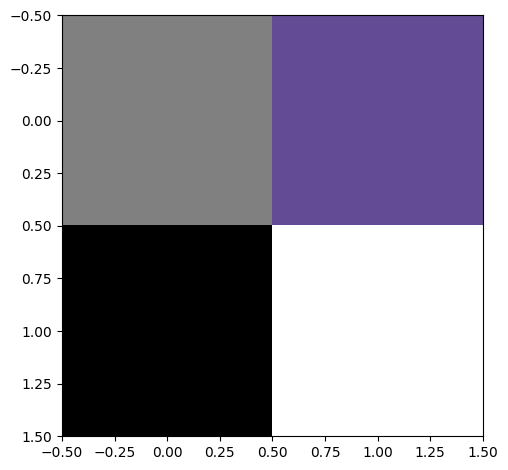

In [5]:
imshow(test)

In [6]:
rgb2hsi(test)

array([[[2.50000000e-01, 0.00000000e+00, 5.01960785e-01],
        [7.19740571e-01, 3.07692307e-01, 4.24836602e-01]],

       [[2.50000000e-01, 1.11022302e-16, 1.00000000e-09],
        [2.50000000e-01, 0.00000000e+00, 1.00000000e+00]]])

In [7]:
hsi2rgb(test)       # Array pass by reference

array([[[128, 128, 128],
        [100,  75, 150]],

       [[  0,   0,   0],
        [255, 255, 255]]], dtype=uint8)

## Question 3

In [8]:
f_square = imread('data/labH_images/color_square.tif')

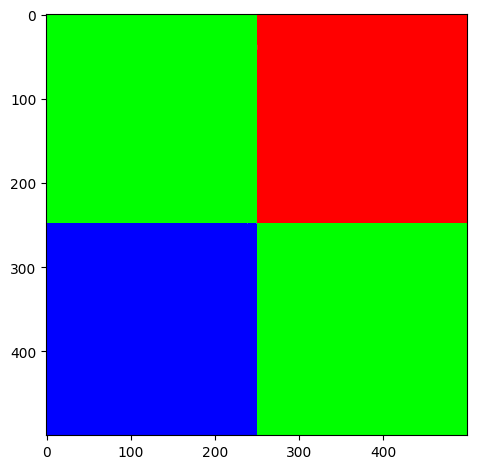

In [9]:
imshow(f_square)

In [10]:
g_square = rgb2hsi(f_square)

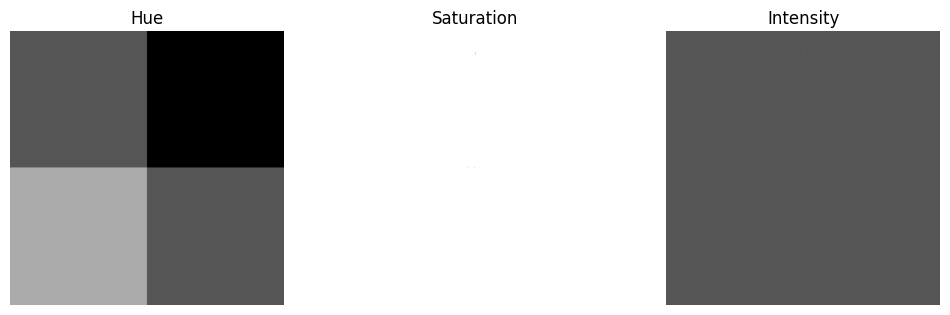

In [11]:
plt.subplots(1,3,figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(g_square[:,:,0],cmap='gray',vmin=0,vmax=1), plt.title('Hue'), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(g_square[:,:,1],cmap='gray',vmin=0,vmax=1), plt.title('Saturation'), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(g_square[:,:,2],cmap='gray',vmin=0,vmax=1), plt.title('Intensity'), plt.axis('off')
plt.show()

Hue is different. Saturation and intensity are equal for all colours. All colours full saturated. Intensity is medium

/home/marcelln/Digital-Image-Processing/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


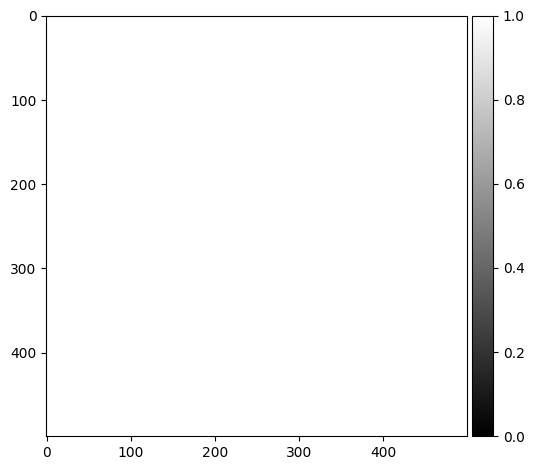

In [12]:
imshow(uniform_filter(g_square[:,:,1],125),vmin=0,vmax=1,cmap='gray')

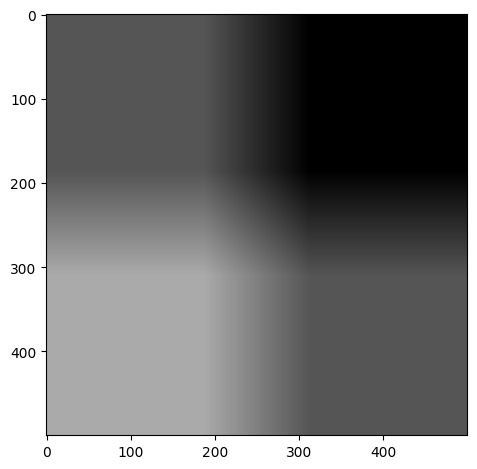

In [13]:
imshow(uniform_filter(g_square[:,:,0],125),vmin=0,vmax=1,cmap='gray')

## Question 4

In [14]:
f_wash_red = img_as_float(imread('data/labH_images/WashingtonDC-Band3-Red-512.tif'))
f_wash_blu = img_as_float(imread('data/labH_images/WashingtonDC-Band1-Blue-512.tif'))
f_wash_gre = img_as_float(imread('data/labH_images/WashingtonDC-Band2-Green-512.tif'))
f_wash_inf = img_as_float(imread('data/labH_images/WashingtonDC-Band4-NearInfrared-512.tif'))

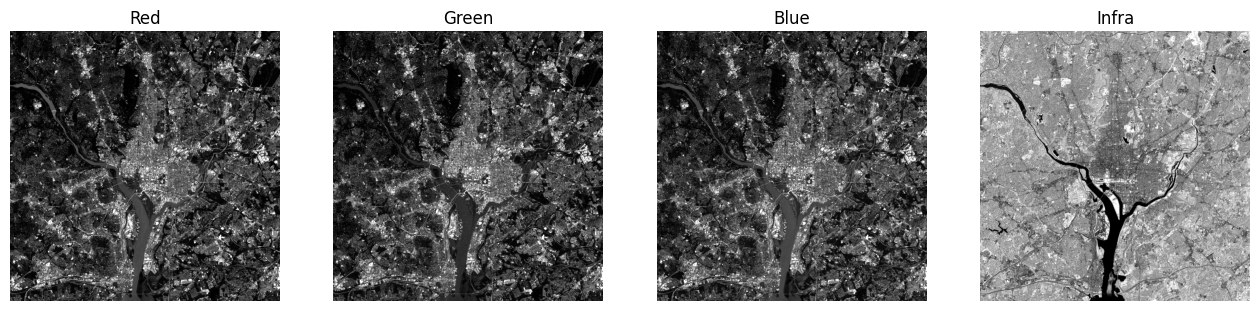

In [15]:
plt.subplots(1,4,figsize=(16,6))
plt.subplot(1,4,1), plt.imshow(f_wash_red,cmap='gray'), plt.title('Red'), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(f_wash_blu,cmap='gray'), plt.title('Green'), plt.axis('off')
plt.subplot(1,4,3), plt.imshow(f_wash_gre,cmap='gray'), plt.title('Blue'), plt.axis('off')
plt.subplot(1,4,4), plt.imshow(f_wash_inf,cmap='gray'), plt.title('Infra'), plt.axis('off')
plt.show()

In [16]:
f_b = np.stack((f_wash_inf,f_wash_gre,f_wash_blu),axis=2)
f_c = np.stack((f_wash_red,f_wash_inf,f_wash_blu),axis=2)

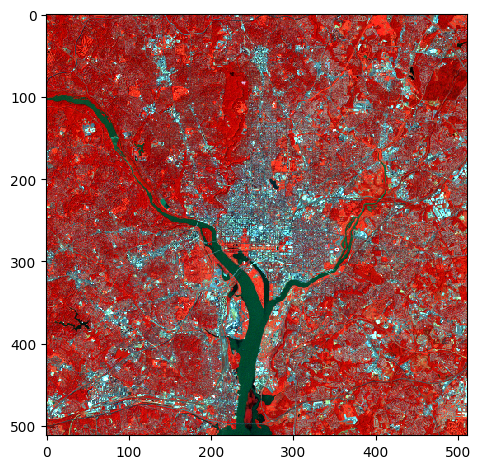

In [17]:
imshow(f_b)

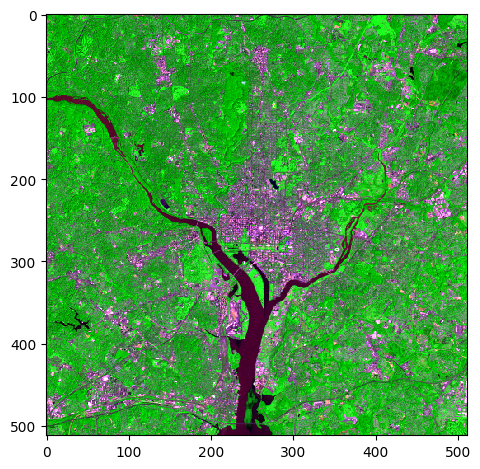

In [18]:
imshow(f_c)

In [19]:
river_mask  = 1-img_as_float(f_wash_inf > 0.3)
river_label = label(river_mask)

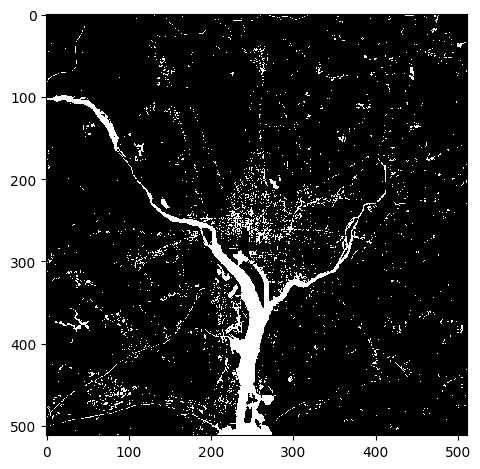

In [20]:
imshow(river_mask)

In [21]:
river_ind = np.isin(river_label,np.delete(np.unique(river_label[-1]),0))
f_wash_blu[river_ind] = 1

In [22]:
f_d = np.stack((f_wash_red,f_wash_gre,f_wash_blu),axis=2)

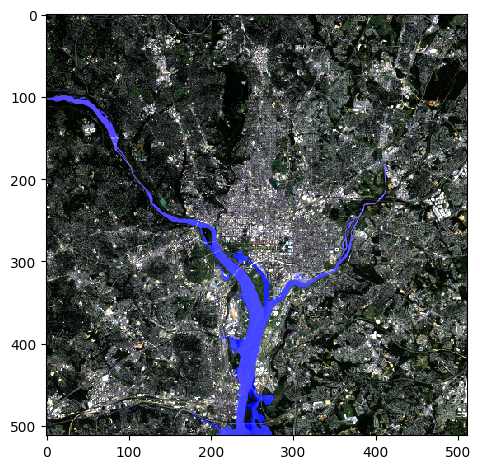

In [23]:
imshow(f_d)

In [24]:
man_mask  = img_as_float(f_wash_red > 0.4)
man_label = label(man_mask)

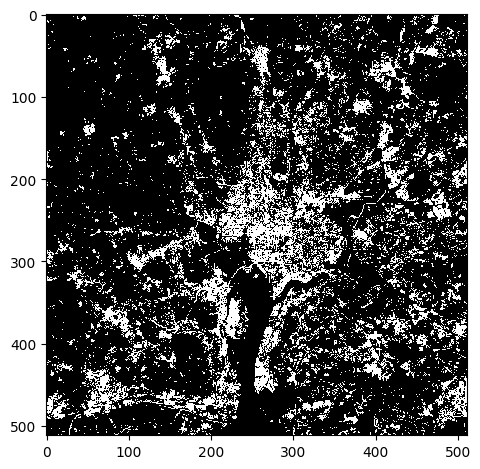

In [25]:
imshow(man_mask)

In [26]:
man_ind = np.where(man_mask==1)
f_wash_red[man_ind] = 1
f_wash_gre[man_ind] = 1
f_e = np.stack((f_wash_red,f_wash_gre,f_wash_blu),axis=2)

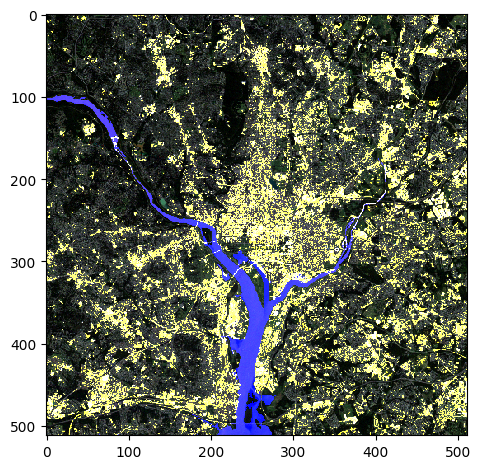

In [27]:
imshow(f_e)

## Question 5

In [28]:
f_weld = imread('data/labH_images/weld-original.tif')

In [29]:
F_weld = np.digitize(f_weld,np.linspace(0,255,5))

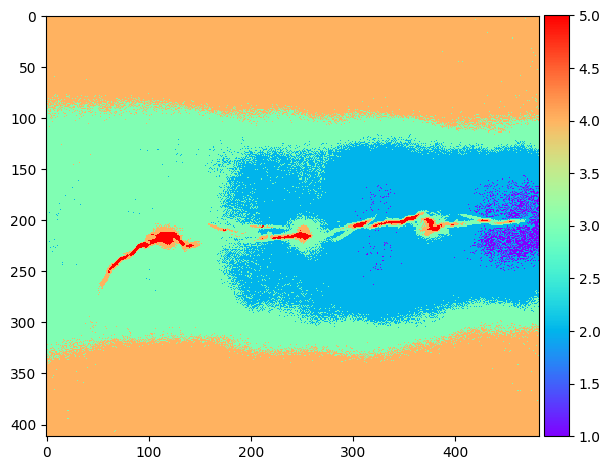

In [30]:
imshow(F_weld,cmap='rainbow')

## Question 6

In [31]:
f_stand = imread('data/labH_images/caster_stand.tif')

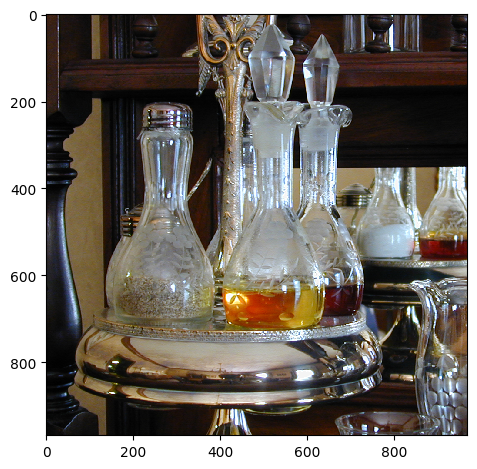

In [32]:
imshow(f_stand)

In [33]:
f_stand_hsv = rgb2hsv(f_stand)
F_stand_hsv = np.stack((f_stand_hsv[:,:,0],f_stand_hsv[:,:,1],equalize_hist(f_stand_hsv[:,:,2])),axis=-1)
g_stand_hsv = hsv2rgb(F_stand_hsv)

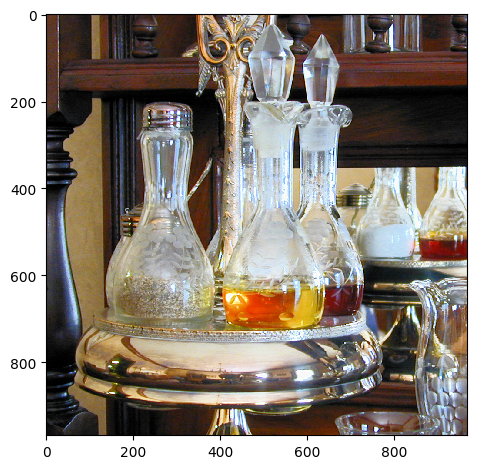

In [34]:
imshow(g_stand_hsv)

In [35]:
f_stand_yiq = rgb2yiq(f_stand)
F_stand_yiq = np.stack((equalize_hist(f_stand_yiq[:,:,0]),f_stand_yiq[:,:,1],f_stand_yiq[:,:,2]),axis=-1)
g_stand_yiq = yiq2rgb(F_stand_yiq)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


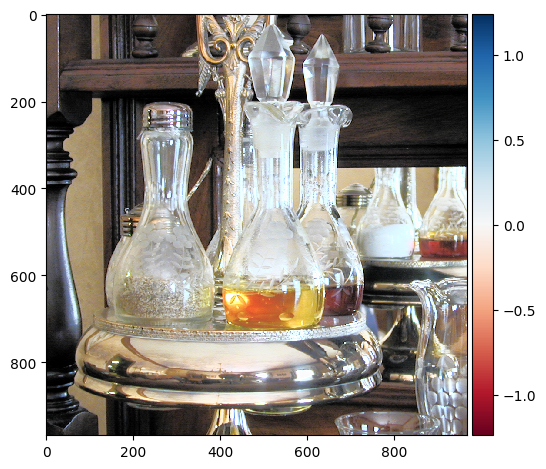

In [36]:
imshow(g_stand_yiq)

## Question 10

In [37]:
f_moon = imread('data/labH_images/jupiter-moon-closeup.tif')

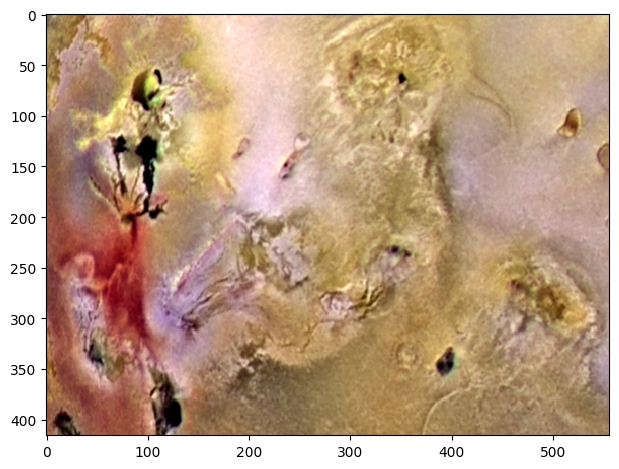

In [38]:
imshow(f_moon)

In [39]:
f_moon_hsv = rgb2hsv(f_moon)

In [40]:
moon_mask = f_moon_hsv[:,:,2]<0.2
f_moon[moon_mask,1] = 255

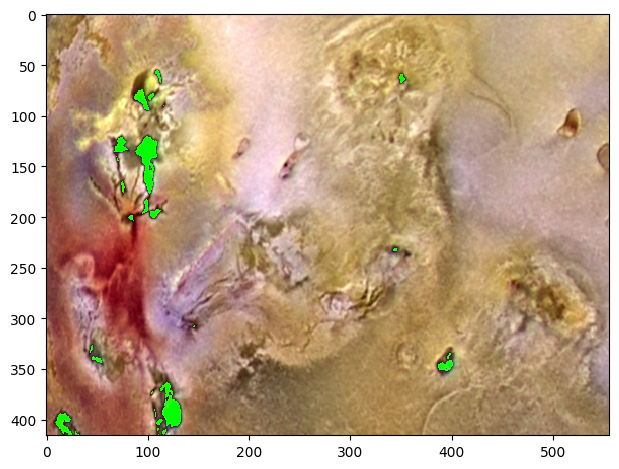

In [41]:
imshow(f_moon)

## Question 11

In [42]:
f_flower = imread('data/labH_images/sunflower.tif')

In [43]:
size = 160
f_flower_fil = np.stack((uniform_filter(f_flower[:,:,0],size),uniform_filter(f_flower[:,:,1],size),uniform_filter(f_flower[:,:,2],size)),axis=-1)

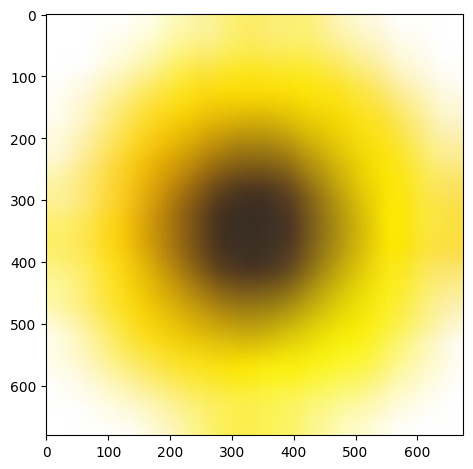

In [44]:
imshow(f_flower_fil)

## Question 12

In [45]:
f_straw = imread('data/labH_images/strawberries-RGB-dark.tif')

In [46]:
f_straw_equ_r = equalize_hist(f_straw[:,:,0])
f_straw_equ_g = equalize_hist(f_straw[:,:,1])
f_straw_equ_b = equalize_hist(f_straw[:,:,2])
f_straw_equ = np.stack((f_straw_equ_r,f_straw_equ_g,f_straw_equ_b),axis=-1)

(<Axes: >, <matplotlib.image.AxesImage at 0x7fd3a8d26aa0>)

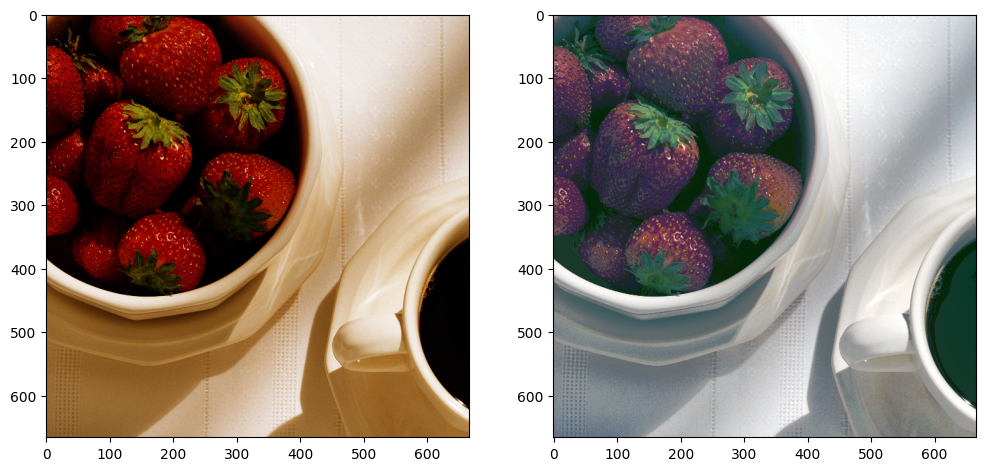

In [47]:
plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(f_straw)
plt.subplot(1,2,2), plt.imshow(f_straw_equ)

The red channel intensity has been reduced, this is clear because the redness of the oringial image was the most promimant and it has high saturation. In the new image the red regions are less intense which means that there has been color distorsion on the image. The green channel was mostly in the shade, it has now been rebalanced and the green colors are more prominant.